<a href="https://colab.research.google.com/github/CHAEEUNPAKR/ML-AISW/blob/main/TensorFlow_Basic_Classification_modify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
len(test_labels)

10000

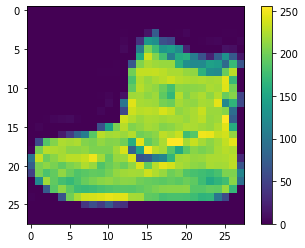

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

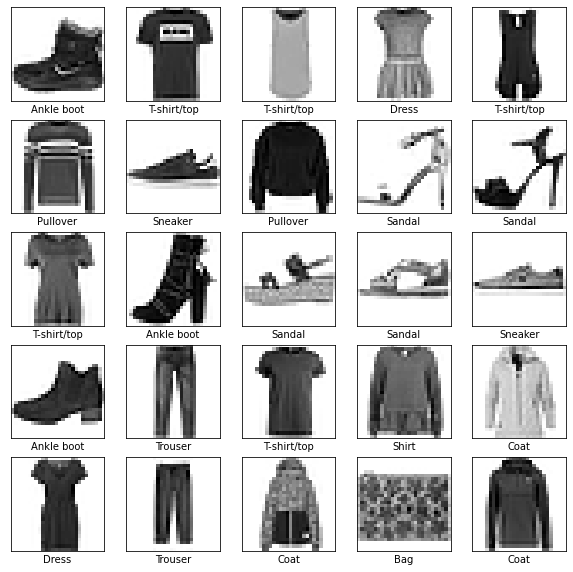

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1733 - accuracy: 0.9347
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1699 - accuracy: 0.9371
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1657 - accuracy: 0.9371
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1619 - accuracy: 0.9388
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1558 - accuracy: 0.9417
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1545 - accuracy: 0.9416
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1510 - accuracy: 0.9428
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1466 - accuracy: 0.9445
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1430 - accuracy: 0.9462
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.141

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.6344 - accuracy: 0.8851
Test accuracy: 0.8851000070571899


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([4.2768063e-27, 1.4837059e-22, 2.0434235e-22, 5.9010090e-23,
       1.1489849e-28, 4.6503218e-10, 1.2009209e-18, 1.8268752e-09,
       7.6167480e-23, 1.0000000e+00], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

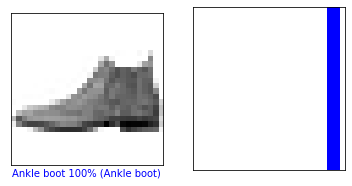

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

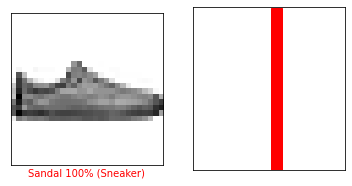

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

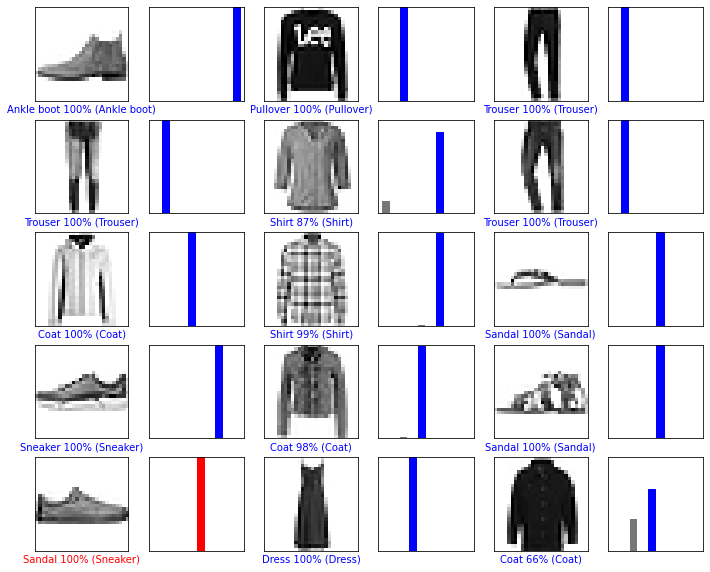

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

(28, 28)


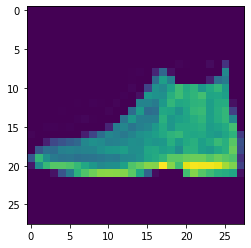

In [ ]:
# Grab an image from the test dataset
img = test_images[0]
plt.imshow(img)

print(img.shape)

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.2768718e-27 1.4837002e-22 2.0434079e-22 5.9010538e-23 1.1489761e-28
  4.6503484e-10 1.2009301e-18 1.8268856e-09 7.6167480e-23 1.0000000e+00]]


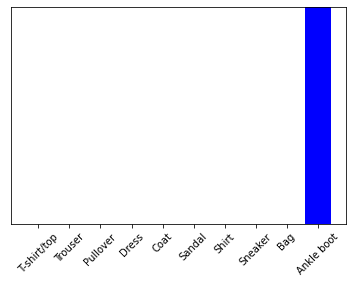

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9

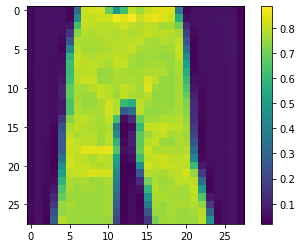

(28, 28)


In [ ]:
from skimage.io import imread
from PIL import Image
from PIL import ImageOps

img = Image.open("34-1.jpg")
im_gray = ImageOps.grayscale(img)
im_gray_size = im_gray.resize((28,28))
im_gray_size.save("34-2.jpg")
img = (255 - np.reshape(im_gray_size, (28,28)))/255.0
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()
print(img.shape)

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.5313962e-20 1.0000000e+00 4.1798781e-16 5.8258100e-16 1.2296463e-14
  8.3778473e-38 1.2160983e-16 1.6686998e-34 2.3895192e-18 0.0000000e+00]]


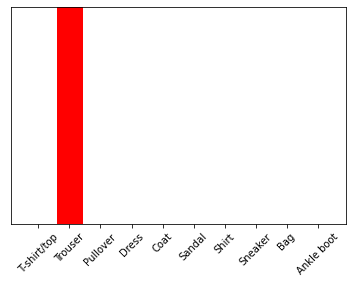

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

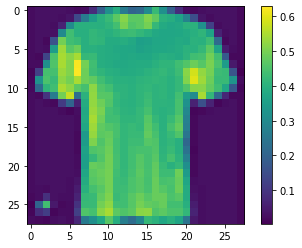

(28, 28)


In [ ]:
from skimage.io import imread
from PIL import Image
from PIL import ImageOps

img = Image.open("35.png")
im_gray = ImageOps.grayscale(img)
im_gray_size = im_gray.resize((28,28))
im_gray_size.save("35-1.jpg")
img = (255 - np.reshape(im_gray_size, (28,28)))/255.0
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()
print(img.shape)

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[9.9997783e-01 1.5519853e-13 1.2332286e-11 3.8675177e-10 2.1438793e-13
  2.1474621e-15 2.2199813e-05 1.0438107e-37 8.8428652e-17 2.3341507e-25]]


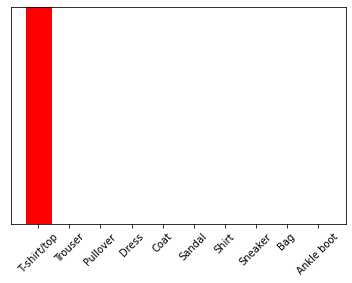

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

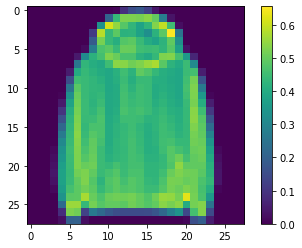

(28, 28)


In [ ]:
from skimage.io import imread
from PIL import Image
from PIL import ImageOps

img = Image.open("10.jpg")
im_gray = ImageOps.grayscale(img)
im_gray_size = im_gray.resize((28,28))
im_gray_size.save("10-1.jpg")
img = (255 - np.reshape(im_gray_size, (28,28)))/255.0
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()
print(img.shape)

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.0062507e-05 5.4951788e-10 6.7157179e-02 5.1356204e-09 9.2940193e-01
  1.9342640e-07 3.4106274e-03 1.8693708e-12 3.8285189e-10 5.6210271e-15]]


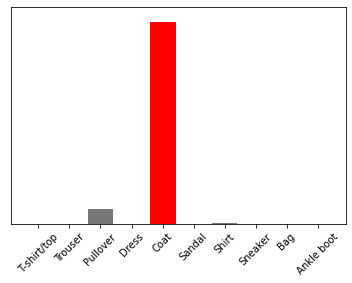

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

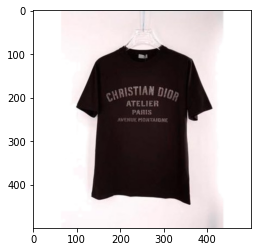

In [ ]:
import cv2
import numpy as np

img = cv2.imread('t.jpeg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

# mask
mask = 255 - mask

kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# anti-alias the mask
# blur alpha channel
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

cv2.imwrite('t-1.jpeg', result)
plt.imshow(result)

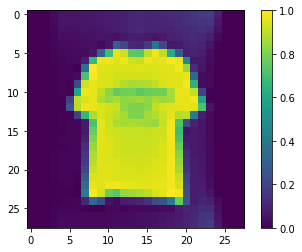

(28, 28)


In [ ]:
from skimage.io import imread
from PIL import Image
from PIL import ImageOps

img = Image.open("t-1.jpeg")
im_gray = ImageOps.grayscale(img)
im_gray_size = im_gray.resize((28,28))
im_gray_size.save("t-2.jpeg")
img = (255 - np.reshape(im_gray_size, (28,28)))/255.0
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()
print(img.shape)

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.0308098e-02 2.5712101e-16 3.5925323e-04 6.4383315e-08 7.5562555e-01
  5.8335228e-16 2.1370697e-01 5.2920873e-31 3.6592779e-10 1.3792142e-14]]


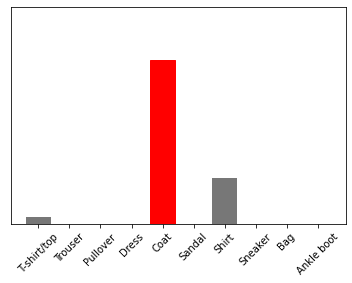

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

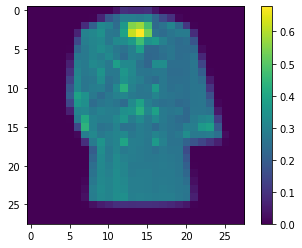

(28, 28)


In [ ]:
from skimage.io import imread
from PIL import Image
from PIL import ImageOps

img = Image.open("c.jpg")
im_gray = ImageOps.grayscale(img)
im_gray_size = im_gray.resize((28,28))
im_gray_size.save("c-2.jpg")
img = (255 - np.reshape(im_gray_size, (28,28)))/255.0
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()
print(img.shape)

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.4671728e-02 3.1022922e-05 1.9046288e-02 2.3280166e-03 5.5886710e-01
  1.6643900e-05 4.0261108e-01 2.2372769e-03 1.9061055e-04 1.9178708e-07]]


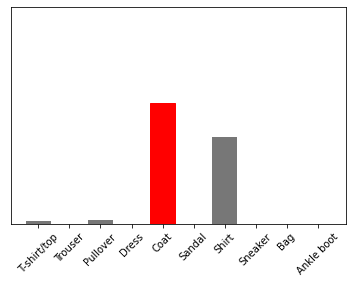

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

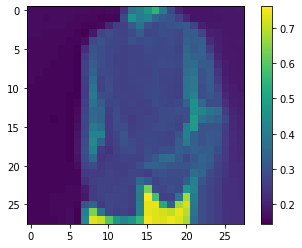

(28, 28)


In [ ]:
from skimage.io import imread
from PIL import Image
from PIL import ImageOps

img = Image.open("s.jpeg")
im_gray = ImageOps.grayscale(img)
im_gray_size = im_gray.resize((28,28))
im_gray_size.save("s-2.jpg")
img = (255 - np.reshape(im_gray_size, (28,28)))/255.0
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()
print(img.shape)

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.33433840e-14 4.45054310e-21 5.64160873e-04 2.34984327e-17
  2.48256658e-11 8.82545300e-18 1.30310645e-02 3.48295448e-16
  9.86404777e-01 4.50688285e-16]]


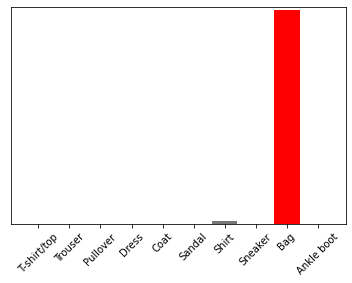

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)